Trabajo Práctico N° 0

#Lectura de datos

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
datos = pd.read_csv("Dst.txt", sep="\s+", header=None, skiprows=15)

In [ ]:
#datos = pd.read_csv("Dst2.txt", header= None, sep='\s+', engine='python')

In [ ]:
print(datos)

In [ ]:
datos.shape

In [ ]:
df= datos.loc[:,3:26]

In [ ]:
df.shape

(31, 24)

In [ ]:
columnas = list()
for i in range(0,24):
   columna = "Hora" + str(i+1)
   columnas.append(columna)

In [ ]:
rows = list()
for i in range(1,32):
   row = "Dia" + str(i)
   rows.append(row)

In [ ]:
df.index = rows
df.columns = columnas

In [ ]:
print(df)

# Extraer tres dias consecutivos 

In [ ]:
#Undia= pd.DataFrame({"Horas" : Horas, "Mediciones": Mediciones})

In [76]:
diasAtipicos= df.iloc[17:20,:]
diasTipicos = df.iloc[21:24,:]

#Spliting de datos

In [77]:
diasAtipicosToArray = diasAtipicos.to_numpy()
diasAtipicosToArrayReshape = diasAtipicosToArray.reshape((diasAtipicosToArray.shape[1]*diasAtipicosToArray.shape[0],1))

In [80]:
diasTipicosToArray = diasTipicos.to_numpy()
diasTipicosToArrayReshape = diasTipicosToArray.reshape((diasTipicosToArray.shape[1]*diasTipicosToArray.shape[0],1))

In [ ]:
from matplotlib import pyplot as plt
plt.plot(diasAtipicosToArrayReshape)

In [ ]:
from matplotlib import pyplot as plt
plt.plot(diasTipicosToArrayReshape)

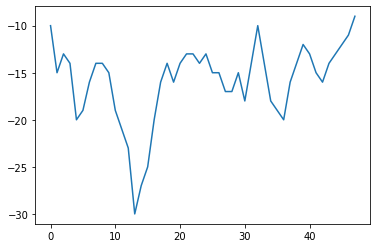

In [84]:
from sklearn.model_selection import train_test_split

#valores de X

dominio = np.arange(0,diasAtipicosToArrayReshape.shape[0]*diasAtipicosToArrayReshape.shape[1])

XA_train, XA_test, yA_train, yA_test = train_test_split(dominio, diasAtipicosToArrayReshape, test_size=0.33, shuffle=False)

plt.figure()
plt.plot(X_train, y_train)

In [85]:
XT_train, XT_test, yT_train, yT_test = train_test_split(dominio, diasTipicosToArrayReshape, test_size=0.33, shuffle=False)

#Modelo

In [87]:
from sklearn.linear_model import LinearRegression
modelA = LinearRegression()
XA_train = XA_train.reshape((-1, 1))
modelA.fit(XA_train, yA_train)

#Googlear un poquito sobre la regresion lineal con skelearn

LinearRegression()

In [86]:
from sklearn.linear_model import LinearRegression
modelT = LinearRegression()
XT_train = XT_train.reshape((-1, 1))
modelT.fit(XT_train, yT_train)

LinearRegression()

#Forecasting

In [88]:
print('Intersection:', modelA.intercept_)
print('Slope:', modelA.coef_)

xA_test_aux = XA_test.reshape((-1, 1))
yA_pred = modelA.predict(xA_test_aux)

Intersection: [-9.94557823]
Slope: [[0.03935085]]


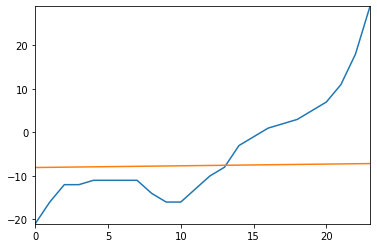

In [89]:
plt.plot(yA_test)
plt.plot(yA_pred)
plt.margins(0)

In [91]:
print('Intersection:', modelT.intercept_)
print('Slope:', modelT.coef_)

xT_test_aux = XT_test.reshape((-1, 1))
yT_pred = modelT.predict(xT_test_aux)

Intersection: [-18.20153061]
Slope: [[0.09634173]]
Intersection: [-18.20153061]
Slope: [[0.09634173]]


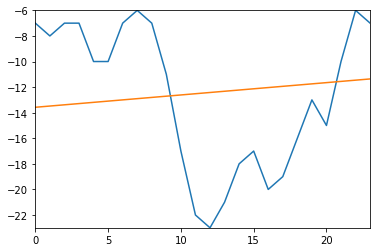

In [94]:
plt.plot(yT_test)
plt.plot(yT_pred)
plt.margins(0)

#Validacion

In [95]:
from sklearn.metrics import mean_squared_error as mse
print(mse(yA_test,yA_pred))

144.73703386366472


In [96]:
from sklearn.metrics import mean_squared_error as mse
print(mse(yT_test,yT_pred))

35.06522081435955


#Observaciones

Probé de elegir dos set de dias diferentes, el que llamé diasAtipico tiene el último día con mediciones muy diferentes a las de los días anteriores y el que llamé diasTipicos tiene tres dias que dentro de todo fluctuaron parecido. Quería ver la diferencia en los ajustes. Si bien ninguna de las rectas es ideal, el error cuadrático medio disminuye mucho en el ajuste para el segundo set de días. 